In [ ]:
!pip install arxiv

In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import arxiv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)


In [ ]:
#QUERY = list(wordcloud.words_.keys())[:50]

In [ ]:
LOAD_DATA = False

if LOAD_DATA:
  patient_client = arxiv.Client(
      page_size = 100,
      delay_seconds = 3,
      num_retries = 10
  )

  search = arxiv.Search(
    query = 'cat:cs.AI',
    max_results = 10000,
    sort_by = arxiv.SortCriterion.Relevance
  )

  results = patient_client.results(search)

  count = 0
  with open("abstracts_new.csv","w", newline='') as csvfile: #a
    writer = csv.writer(csvfile, delimiter = '|')
    writer.writerow(['Title', 'Date', 'Abstract'])
    for result in results:
      temp_string = result.summary
      temp_string = " ".join(temp_string.split("\n"))
      writer.writerow([result.title, result.published, temp_string])
      count += 1
      if count % 100 == 0:
        print('%s abstracts loaded' % count)

In [ ]:
df = pd.read_csv('abstracts_cs_AI.csv', delimiter='|')

In [ ]:
def condition(word):
  matches = ['/', '.', '%', '{', '$', '(', '[', '^', '\\', ':', '1', '2',
             '3', '4', '5', '6', '7', '8', '9', '0', ')', '}', ']', '?']
  if any(x in word for x in matches):
    return False
  return True

df['Abstract'] = \
df['Abstract'].map(lambda x: (re.sub('[,\.!?]', '', x)).lower())

In [ ]:
df.drop(['Title'], axis = 1, inplace = True)

In [ ]:
df

,Date,Abstract
0,1993-08-01 00:00:00+00:00,because of their occasional need to return to ...
1,1993-08-01 00:00:00+00:00,market price systems constitute a well-underst...
2,1993-09-01 00:00:00+00:00,we describe an extensive study of search in gs...
3,1993-11-01 00:00:00+00:00,as real logic programmers normally use cut () ...
4,1993-11-01 00:00:00+00:00,to support the goal of allowing users to recor...
...,...,...
9995,2016-02-08 19:32:18+00:00,we adress the problem of dueling bandits defin...
9996,2016-02-05 14:10:44+00:00,we study the strategic aspects of social influ...
9997,2016-02-10 08:06:32+00:00,existing research in crowdsourcing has investi...
9998,2016-02-10 12:27:04+00:00,for complex high-dimensional markov decision p...


In [ ]:
df.Date = pd.to_datetime(df.Date)


сделаем андерсамплинг, чтобы 2013 не вмешивался

In [ ]:
ids = df[df.Date.dt.year == 2013].index


In [ ]:
drop_indices = np.random.choice(ids, 769, replace=False)
len(drop_indices)

769

In [ ]:
df_subset = df.drop(drop_indices)

In [ ]:
df = df_subset.copy()

In [ ]:
dates = df.Date.copy()
df.Date = df.Date.apply(lambda x: x.timetuple()[0])

In [ ]:
df.groupby(by='Date').agg('count')


,Abstract
Date,
1993,6
1994,14
1995,27
1996,28
1997,19
1998,27
1999,24
2000,107
2001,48


## wordcloud

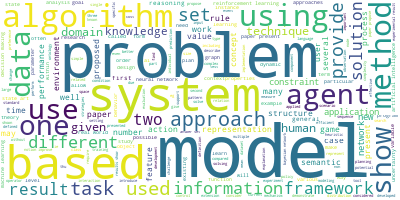

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Abstract'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
myDictionary = wordcloud.words_

In [ ]:
myDictionary=pd.DataFrame.from_dict(wordcloud.words_, orient='index')

In [ ]:
myDictionary.head(50)

,0
model,1.000000
problem,0.697323
system,0.672167
based,0.626484
algorithm,0.626082
method,0.546790
using,0.529885
use,0.455625
agent,0.446166
one,0.432481


In [ ]:
df

,Date,Abstract
0,1993,because of their occasional need to return to ...
1,1993,market price systems constitute a well-underst...
2,1993,we describe an extensive study of search in gs...
3,1993,as real logic programmers normally use cut () ...
4,1993,to support the goal of allowing users to recor...
...,...,...
9995,2016,we adress the problem of dueling bandits defin...
9996,2016,we study the strategic aspects of social influ...
9997,2016,existing research in crowdsourcing has investi...
9998,2016,for complex high-dimensional markov decision p...


## выделение ключевых слов

Перед выделением ключевых слов лемматизируем наш словарь

In [ ]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lem_abs = df.copy()
lem_abs['Abstract'] = df['Abstract'].apply(lambda x: \
                                           ' '.join([lemmatizer.lemmatize(word) \
                                                     for word in x.split()]))

In [ ]:
df = lem_abs.copy()

In [ ]:
df

,Date,Abstract
0,1993,because of their occasional need to return to ...
1,1993,market price system constitute a well-understo...
2,1993,we describe an extensive study of search in gs...
3,1993,a real logic programmer normally use cut () an...
4,1993,to support the goal of allowing user to record...
...,...,...
9995,2016,we adress the problem of dueling bandit define...
9996,2016,we study the strategic aspect of social influe...
9997,2016,existing research in crowdsourcing ha investig...
9998,2016,for complex high-dimensional markov decision p...


Сконкатенируем все документы внутри года в один большой документ

In [ ]:
df.iloc[0]

Date                                                     1993
Abstract    because of their occasional need to return to ...
Name: 0, dtype: object

In [ ]:
experiment = df.groupby(by = 'Date')['Abstract'].apply(lambda x: ' '.join(x))


In [ ]:
experiment = experiment.to_list()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = experiment #!!!
vectorizer = TfidfVectorizer(use_idf=False)
X = vectorizer.fit_transform(corpus)
print(len(vectorizer.get_feature_names_out()))

print(X.shape)


26558
(30, 26558)


In [ ]:
print(len(vectorizer.get_feature_names_out()))


26558


In [ ]:
import random
from scipy.stats import kstest
import scipy
from scipy.stats import norm

In [ ]:
#X = X.T

In [ ]:
X_data = pd.DataFrame.sparse.from_spmatrix(X)

In [ ]:
X_data

,0,1,2,3,4,5,6,7,8,9,...,26548,26549,26550,26551,26552,26553,26554,26555,26556,26557
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00074


In [ ]:
yearsxwords = X_data

In [ ]:
yearsxwords = yearsxwords.transpose()

In [ ]:
x = yearsxwords.iloc[0]

In [ ]:
from scipy.stats import norm

In [ ]:
norm.fit(x)

(1.1108453354448433e-05, 5.982085206607093e-05)

In [ ]:
noise = np.random.normal(0, 1, 30)

In [ ]:
x = x + noise*norm.fit(x)[1]*0.5

In [ ]:
np.count_nonzero(x)

30

In [ ]:
kstest(x, 'norm', args=norm.fit(x))

KstestResult(statistic=0.2647980646071869, pvalue=0.024007324696346838)

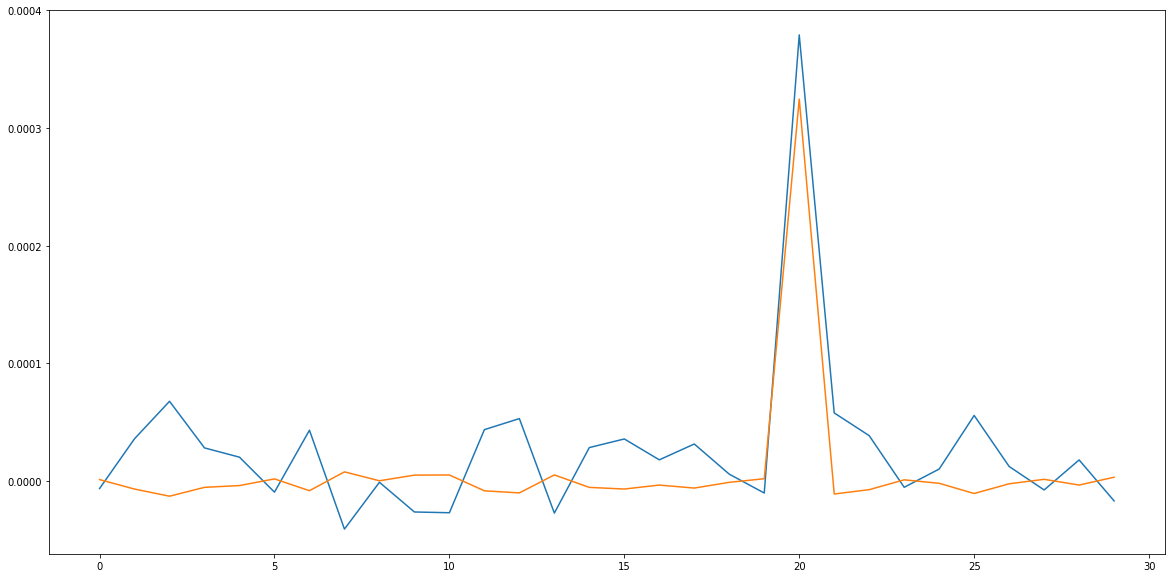

In [ ]:
plt.plot(x.to_list())
plt.plot((x - noise*norm.fit(x)[1]*0.5).to_list())

In [ ]:
yearsxwords['normal'] = yearsxwords.apply(lambda x: kstest(x + noise*norm.fit(x)[1]*0.5, 'norm', args = norm.fit(x))[1], axis = 1)

In [ ]:
yearsxwords

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,normal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.075989
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000101,0.00000,0.0,0.0,0.0,0.091441
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000104,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.075989
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.00014,0.0,0.0,0.0,0.075989
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000104,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.075989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.075989
26554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.075989
26555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000101,0.00000,0.0,0.0,0.0,0.075989
26556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.000101,0.00000,0.0,0.0,0.0,0.075989


In [ ]:
vocab = vectorizer.get_feature_names_out()


16404 -е слово:  not


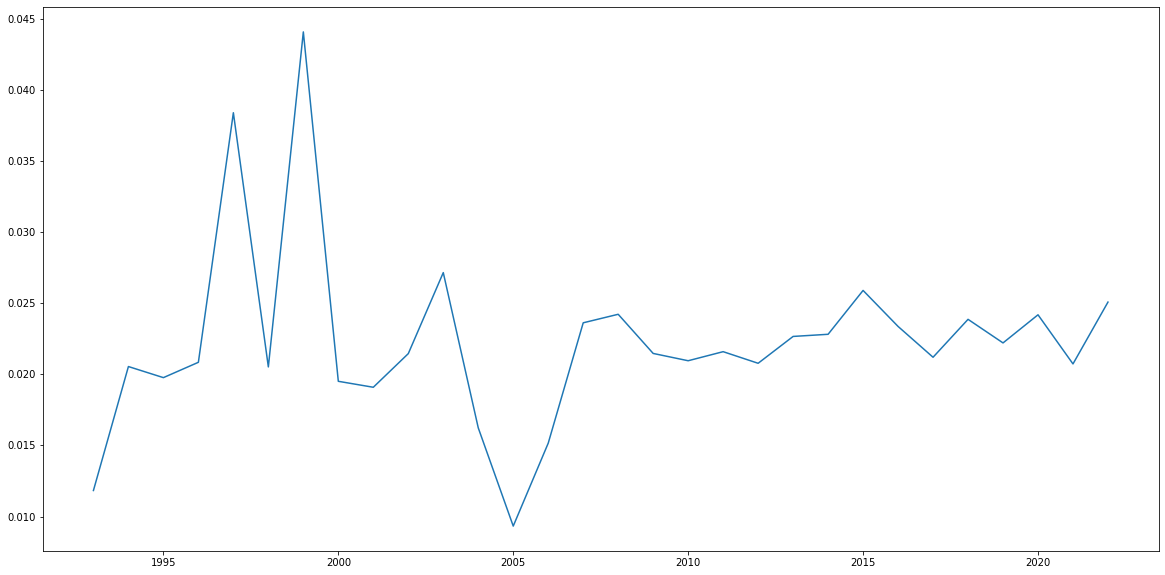

In [ ]:
ONE_WORD_PLOT = 'not'

id = 0
for i in range(len(vocab)):
  if vocab[i] == ONE_WORD_PLOT:
    print(i, '-е слово: ', vocab[i])
    id = i
    break

y = yearsxwords.loc[id][:-1]
x = y.index + 1993

plt.plot(x, y)

15099 -е слово:  mimic


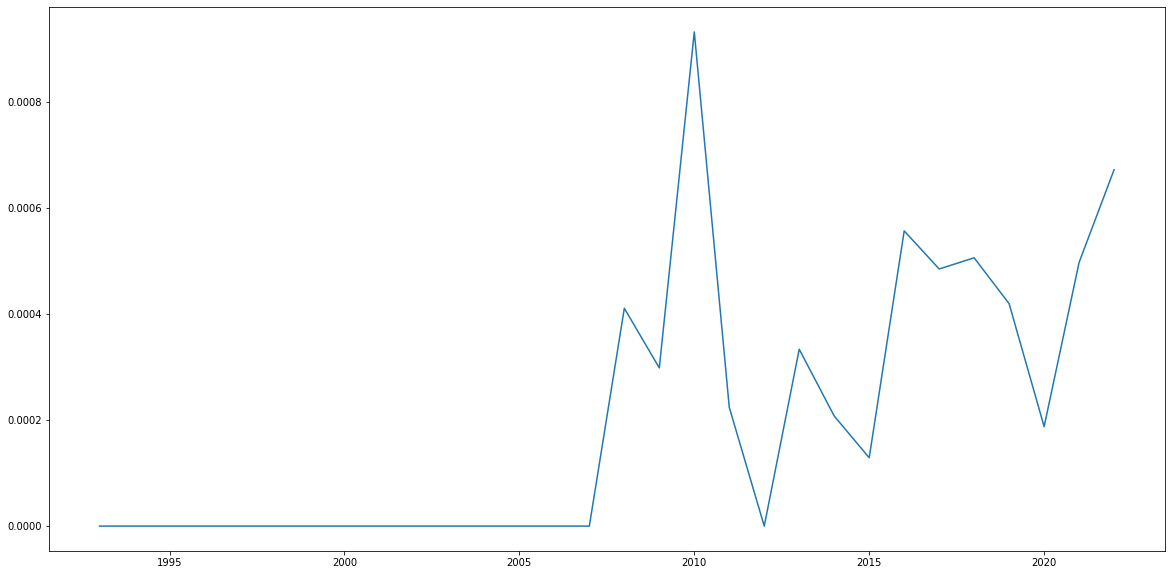

In [ ]:
ONE_WORD_PLOT = 'mimic'

id = 0
for i in range(len(vocab)):
  if vocab[i] == ONE_WORD_PLOT:
    print(i, '-е слово: ', vocab[i])
    id = i
    break

y = yearsxwords.loc[id][:-1]
x = y.index + 1993

plt.plot(x, y)

16238 -е слово:  nlp


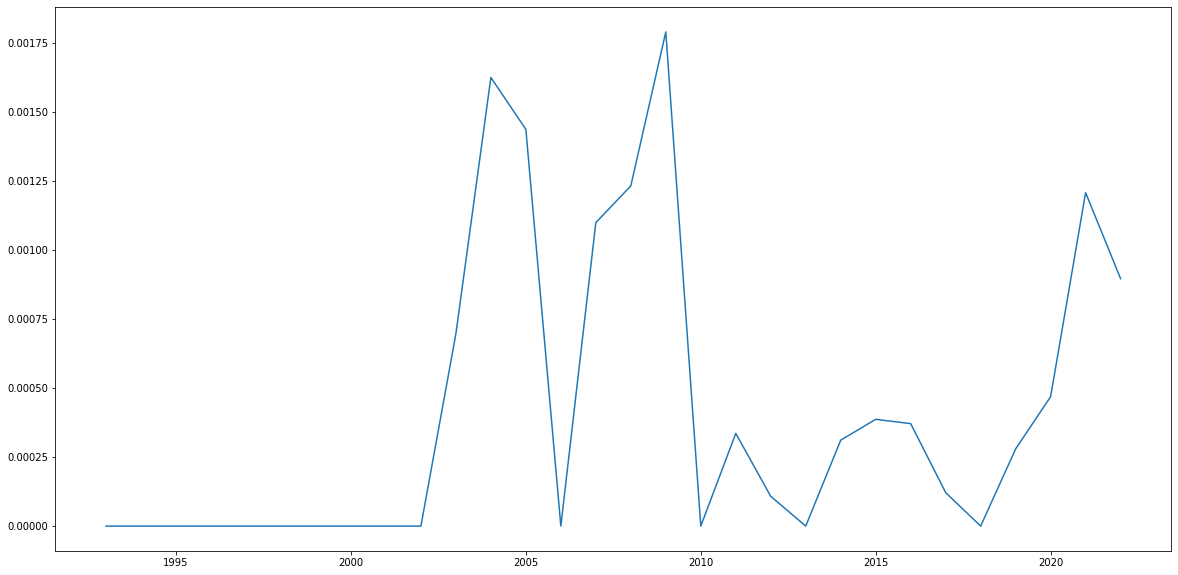

In [ ]:
ONE_WORD_PLOT = 'nlp'

id = 0
for i in range(len(vocab)):
  if vocab[i] == ONE_WORD_PLOT:
    print(i, '-е слово: ', vocab[i])
    id = i
    break

y = yearsxwords.loc[id][:-1]
x = y.index + 1993

plt.plot(x, y)

In [ ]:
yearsxwords.sort_values(by='normal', inplace=True)

In [ ]:
yearsxwords

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,normal
1429,0.000000,0.000000,0.000000,0.002606,0.000000,0.004560,0.003389,0.004682,0.000000,0.000000,...,0.002489,0.003221,0.003709,0.002786,0.002932,0.002793,0.002999,0.002414,0.002015,0.001187
11896,0.000000,0.000000,0.004942,0.002606,0.003198,0.000000,0.003389,0.000780,0.004772,0.001480,...,0.002489,0.003478,0.004080,0.003150,0.002932,0.002793,0.004686,0.004473,0.005373,0.001380
23969,0.000000,0.010273,0.007412,0.010422,0.012794,0.027359,0.016946,0.014827,0.015908,0.017754,...,0.011199,0.011079,0.011311,0.011992,0.010213,0.012709,0.013591,0.011643,0.012537,0.002571
10905,0.000000,0.020546,0.019767,0.028661,0.019190,0.022799,0.027114,0.022630,0.025453,0.031070,...,0.023331,0.024863,0.022808,0.025560,0.025177,0.025279,0.029712,0.028255,0.030000,0.003707
2921,0.011835,0.030819,0.029650,0.041688,0.044777,0.025079,0.023724,0.055405,0.049314,0.026631,...,0.043032,0.041481,0.049881,0.047364,0.044996,0.049301,0.046771,0.052535,0.052836,0.004267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,0.000000,0.000000,0.002471,0.000000,0.000000,0.000000,0.003389,0.000000,0.000000,0.000000,...,0.000311,0.000129,0.001298,0.000848,0.001011,0.000978,0.000562,0.000923,0.001119,0.964049
6472,0.000000,0.010273,0.002471,0.000000,0.000000,0.002280,0.000000,0.000780,0.001591,0.001480,...,0.003318,0.001031,0.001298,0.001817,0.001112,0.000559,0.002062,0.000923,0.000448,0.974802
6887,0.000000,0.000000,0.002471,0.000000,0.000000,0.000000,0.000000,0.000780,0.000000,0.000740,...,0.004148,0.002576,0.003152,0.002786,0.002225,0.002235,0.003374,0.003976,0.005149,0.975560
17103,0.000000,0.000000,0.004942,0.002606,0.000000,0.002280,0.006778,0.000780,0.001591,0.001480,...,0.002385,0.001675,0.001298,0.002059,0.001719,0.002793,0.001781,0.002343,0.000896,0.978951


In [ ]:
num_keywords = len(yearsxwords[yearsxwords['normal']<0.05].index.to_list())

In [ ]:
keywords = yearsxwords.sort_values(by='normal')[:num_keywords].index.to_list()

(array([1.1000e+01, 8.0000e+00, 1.3900e+02, 5.7000e+01, 5.5000e+01,
        7.7000e+01, 8.6000e+01, 1.3775e+04, 2.6600e+02, 3.5500e+02,
        4.2500e+02, 4.5100e+02, 5.1900e+02, 6.2800e+02, 9.7400e+02,
        9.2300e+02, 2.2600e+02, 2.2600e+02, 2.4000e+02, 2.4300e+02,
        2.5900e+02, 2.7500e+02, 3.3200e+02, 3.3600e+02, 2.6400e+02,
        1.7100e+02, 1.5600e+02, 1.6400e+02, 1.7700e+02, 1.7300e+02,
        2.0700e+02, 1.5400e+02, 1.6400e+02, 1.5600e+02, 1.6400e+02,
        1.3800e+02, 1.0700e+02, 1.2200e+02, 1.1500e+02, 1.0400e+02,
        1.3000e+02, 1.2900e+02, 1.2700e+02, 1.0200e+02, 1.2000e+02,
        1.1100e+02, 1.1000e+02, 1.0500e+02, 8.9000e+01, 9.5000e+01,
        1.0200e+02, 8.6000e+01, 8.2000e+01, 7.5000e+01, 8.6000e+01,
        6.2000e+01, 7.4000e+01, 8.1000e+01, 8.0000e+01, 6.6000e+01,
        6.6000e+01, 6.2000e+01, 6.4000e+01, 6.0000e+01, 5.0000e+01,
        4.6000e+01, 4.3000e+01, 5.2000e+01, 4.5000e+01, 5.4000e+01,
        4.7000e+01, 3.6000e+01, 3.8000e+01, 3.30

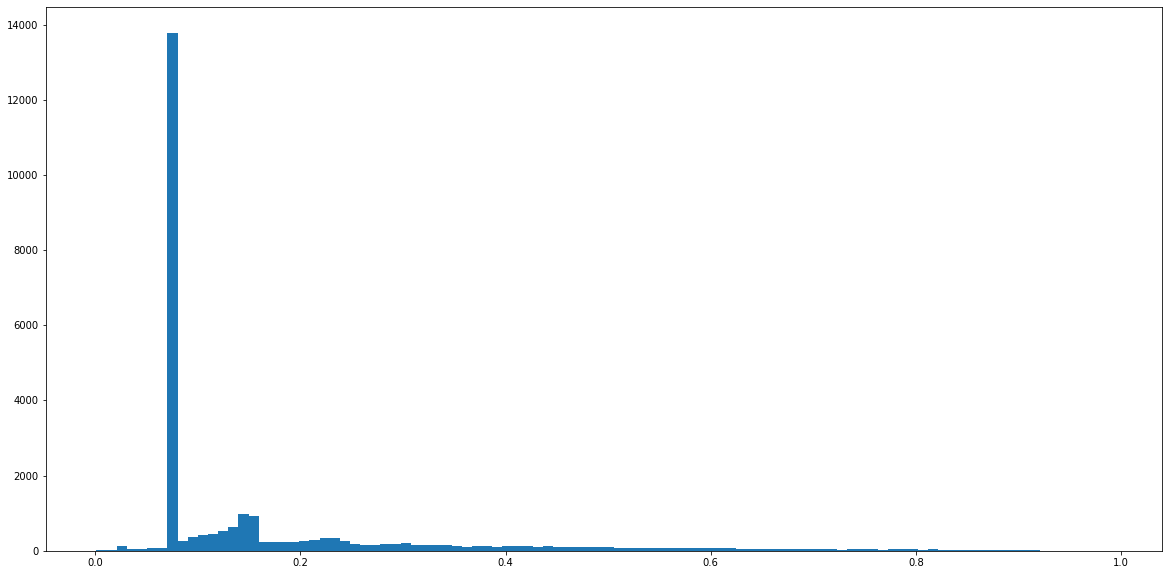

In [ ]:
plt.hist(yearsxwords['normal'], bins = 100)

In [ ]:
len(keywords)

266

In [ ]:
keywords

[1429,
 11896,
 23969,
 10905,
 2921,
 17174,
 26097,
 12727,
 23072,
 4978,
 16804,
 13792,
 3872,
 20414,
 21160,
 10553,
 11610,
 16295,
 6424,
 13259,
 15717,
 6501,
 23788,
 9848,
 3131,
 13356,
 3148,
 9510,
 24413,
 3055,
 304,
 13434,
 13137,
 1374,
 24232,
 24287,
 9568,
 12996,
 13390,
 13468,
 14646,
 7296,
 10066,
 22547,
 26016,
 7295,
 2180,
 2167,
 13611,
 23193,
 1130,
 13594,
 9933,
 9929,
 9754,
 24008,
 13797,
 13234,
 22154,
 22049,
 10152,
 7023,
 2525,
 22153,
 12490,
 25937,
 25904,
 22040,
 7019,
 21930,
 255,
 21888,
 21842,
 21454,
 21433,
 14525,
 21088,
 13800,
 22506,
 22316,
 307,
 23773,
 23855,
 1208,
 256,
 7022,
 14553,
 4789,
 3149,
 14647,
 6662,
 12187,
 942,
 14819,
 17350,
 4937,
 5218,
 4884,
 11617,
 3494,
 15383,
 14561,
 20189,
 15411,
 3599,
 26416,
 880,
 15412,
 3699,
 15614,
 16623,
 10630,
 19710,
 166,
 16331,
 4137,
 4500,
 6034,
 6023,
 18062,
 5414,
 8412,
 3925,
 16046,
 10989,
 19424,
 18351,
 19413,
 19113,
 3858,
 11591,
 16098,
 

Это был список индексов, то есть номеров слов. Заведем список самих этих слов для читаемости:





In [ ]:
keywords_str = keywords.copy()

vocab = vectorizer.get_feature_names_out()
for i in range(len(keywords_str)):
  temp = keywords_str[i]
  keywords_str[i] = vocab[temp]

In [ ]:
len(keywords_str)

266

In [ ]:
keywords_str

['after',
 'improvement',
 'they',
 'have',
 'based',
 'over',
 'where',
 'investigate',
 'such',
 'community',
 'on',
 'lexicographic',
 'calculus',
 'response',
 'scale',
 'graph',
 'identify',
 'non',
 'decidability',
 'key',
 'multiple',
 'deduction',
 'termination',
 'framework',
 'best',
 'knowledge',
 'beyond',
 'fixpoints',
 'transitive',
 'being',
 '1989a',
 'kuleuven',
 'k45',
 'aelb',
 'torasso91',
 'tp',
 'floundering',
 'jaulin',
 'konolige',
 'labelingwe',
 'maxiconsistency',
 'disorganized',
 'gadel',
 'ssm',
 'webber',
 'disorganization',
 'arbibrary',
 'apt99b',
 'lazyboosting',
 'supervise',
 'aclp',
 'laws',
 'fruhwirth',
 'frontends',
 'formentioned',
 'thoughttreasure',
 'lexis',
 'kem',
 'sneps',
 'slg',
 'gb',
 'diaz',
 'atoam',
 'snebr',
 'interargument',
 'warrents',
 'wam',
 'sld',
 'diangosis',
 'singer',
 '191',
 'simonis',
 'sigma_2p',
 'semant',
 'selectional',
 'marraro',
 'saten',
 'lexpir',
 'sql3',
 'spaceship',
 '1990s',
 'teodor',
 'textsf',
 'adaboo

Итак, у нас есть индексы ключевых слов. Создадим таблицу tf признаков для каждого документа для этих слов

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['Abstract'] #!!!
vectorizer = TfidfVectorizer(use_idf=False)
keyword_data = vectorizer.fit_transform(corpus)
print(len(vectorizer.get_feature_names_out()))

print(keyword_data.shape)
keyword_data = pd.DataFrame.sparse.from_spmatrix(keyword_data)

26558
(9231, 26558)


In [ ]:
dates

0      1993-08-01 00:00:00+00:00
1      1993-08-01 00:00:00+00:00
2      1993-09-01 00:00:00+00:00
3      1993-11-01 00:00:00+00:00
4      1993-11-01 00:00:00+00:00
                  ...           
9226   2016-02-08 19:32:18+00:00
9227   2016-02-05 14:10:44+00:00
9228   2016-02-10 08:06:32+00:00
9229   2016-02-10 12:27:04+00:00
9230   2016-02-10 20:29:25+00:00
Name: Date, Length: 9231, dtype: datetime64[ns, UTC]

In [ ]:
vocab[1429]

'after'

In [ ]:
keyword_data = keyword_data[keywords]

In [ ]:
keyword_data.set_axis(keywords_str, axis=1, inplace = True)

In [ ]:
keyword_data

,after,improvement,they,have,based,over,where,investigate,such,community,...,benefits,consequence,nested,therefore,console,benefit,premise,preferential,checking,anti
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.049386,0.049386,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.040064,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,0.0,0.0,0.0,0.000000,0.000000,0.0,0.056433,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9227,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9228,0.0,0.0,0.0,0.038042,0.038042,0.0,0.038042,0.038042,0.076084,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9229,0.0,0.0,0.0,0.000000,0.000000,0.0,0.064685,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
dates.reset_index(drop = True, inplace = True)

In [ ]:
keyword_data = pd.concat([dates, keyword_data], axis = 1)

In [ ]:
keyword_data[keyword_data.Date.dt.year == 2013]

,Date,after,improvement,they,have,based,over,where,investigate,such,...,benefits,consequence,nested,therefore,console,benefit,premise,preferential,checking,anti
1499,2013-01-08 02:28:49+00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1500,2013-01-08 02:29:17+00:00,0.0,0.000000,0.000000,0.041739,0.041739,0.041739,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1501,2013-01-08 02:29:44+00:00,0.0,0.000000,0.000000,0.000000,0.093250,0.000000,0.000000,0.0,0.093250,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1502,2013-01-10 18:52:32+00:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1503,2013-01-10 16:22:32+00:00,0.0,0.000000,0.000000,0.047511,0.142534,0.000000,0.047511,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,2013-12-17 04:44:04+00:00,0.0,0.045038,0.000000,0.045038,0.090075,0.090075,0.000000,0.0,0.045038,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8751,2013-12-17 10:14:15+00:00,0.0,0.000000,0.053452,0.053452,0.106904,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.053452,0.0,0.0,0.0,0.0
8752,2013-12-23 17:40:08+00:00,0.0,0.000000,0.000000,0.113592,0.056796,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8753,2013-12-25 09:23:49+00:00,0.0,0.000000,0.000000,0.000000,0.131590,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
keyword_data.to_csv('keyword_data.csv')

In [ ]:
keyword_freqs = yearsxwords[yearsxwords['normal']<0.05].copy()

In [ ]:
keyword_freqs.drop(['normal'], axis =1, inplace=True)

In [ ]:
keyword_freqs

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1429,0.000000,0.000000,0.000000,0.002606,0.000000,0.004560,0.003389,0.004682,0.000000,0.000000,...,0.002777,0.002489,0.003221,0.003709,0.002786,0.002932,0.002793,0.002999,0.002414,0.002015
11896,0.000000,0.000000,0.004942,0.002606,0.003198,0.000000,0.003389,0.000780,0.004772,0.001480,...,0.002777,0.002489,0.003478,0.004080,0.003150,0.002932,0.002793,0.004686,0.004473,0.005373
23969,0.000000,0.010273,0.007412,0.010422,0.012794,0.027359,0.016946,0.014827,0.015908,0.017754,...,0.008331,0.011199,0.011079,0.011311,0.011992,0.010213,0.012709,0.013591,0.011643,0.012537
10905,0.000000,0.020546,0.019767,0.028661,0.019190,0.022799,0.027114,0.022630,0.025453,0.031070,...,0.024439,0.023331,0.024863,0.022808,0.025560,0.025177,0.025279,0.029712,0.028255,0.030000
2921,0.011835,0.030819,0.029650,0.041688,0.044777,0.025079,0.023724,0.055405,0.049314,0.026631,...,0.041435,0.043032,0.041481,0.049881,0.047364,0.044996,0.049301,0.046771,0.052535,0.052836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,0.000000,0.005136,0.002471,0.005211,0.003198,0.004560,0.000000,0.000780,0.000000,0.003699,...,0.002333,0.002800,0.001546,0.002967,0.003634,0.002528,0.002654,0.002343,0.003479,0.005597
18643,0.000000,0.000000,0.000000,0.000000,0.000000,0.004560,0.000000,0.000780,0.000000,0.001480,...,0.000000,0.000518,0.000515,0.000000,0.000121,0.000910,0.000279,0.000281,0.000355,0.000896
18624,0.000000,0.000000,0.000000,0.000000,0.000000,0.011400,0.000000,0.001561,0.000000,0.005178,...,0.000222,0.000311,0.000129,0.000185,0.000000,0.000202,0.000140,0.000656,0.000426,0.000000
4384,0.011835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003902,0.000000,0.002219,...,0.000111,0.001555,0.001288,0.000742,0.000969,0.000910,0.000978,0.002437,0.002130,0.002239


## сделаем LDA, чтобы проанализировать разделение на темы

In [ ]:
def print_topics(count_vectorizer, phi_matrix, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    res = []
    for topic_idx, topic in enumerate(phi_matrix):
        print("\nTopic {}".format(topic_idx))
        cur_res = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        res.append(cur_res)
    return res

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(df['Abstract'].values)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

model = LatentDirichletAllocation(n_components=10, max_iter=30, learning_method="batch", n_jobs=-1, random_state=42)

In [ ]:
model.fit(count_data)
res = model.transform(count_data)
r = print_topics(count_vectorizer, model.components_, 10)

Много garbage-тем. Поможем аллокатору и уберем самые частые слова.

In [ ]:
from collections import Counter

words = []
for i in range(len(df['Abstract'])):
  words.extend(df['Abstract'][i].split())

In [ ]:
words = [word.lower() for word in words]
bow = Counter(words).most_common()
bow = dict(bow)
bow = {key:val for key, val in bow.items() if val > 10 and val < 600}

In [ ]:
df['Abstract'] = df['Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() in bow]))

In [ ]:
df

In [ ]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(df['Abstract'].values)

In [ ]:
model = LatentDirichletAllocation(n_components=10, max_iter=30, learning_method="batch", n_jobs=-1, random_state=42)

In [ ]:
model.fit(count_data)
res = model.transform(count_data)


In [ ]:
r = print_topics(count_vectorizer, model.components_, 10)

In [ ]:
def print_topics(count_vectorizer, phi_matrix, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    res = []
    for topic_idx, topic in enumerate(phi_matrix):
        cur_res = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        res.append(cur_res)
    return res

In [ ]:
for year in np.unique(df['Date'].values):
  from_this_year = df[df['Date'] == year]
  print('\nYear %i, %i articles'%(year, len(from_this_year)))
  count_vectorizer = CountVectorizer()
  count_data = count_vectorizer.fit_transform(from_this_year['Abstract'].values)

  model = LatentDirichletAllocation(n_components=1, max_iter=30, learning_method="batch", n_jobs=-1, random_state=42)
  model.fit(count_data)
  res = model.transform(count_data)
  r = print_topics(count_vectorizer, model.components_, 10)

In [ ]:
#years = np.vstack((np.unique(df['Date'].values)[:, None], np.array(1000000)))
years = np.arange(1991, 2023)

for year in years.reshape((-1, 2)):
  from_this_year = df[(df['Date'] >= year[0]) & (df['Date'] <= year[-1])]
  
  print('\nYears %i-%i, %i articles'%(year[0],year[-1], len(from_this_year)))
  count_vectorizer = CountVectorizer()
  count_data = count_vectorizer.fit_transform(from_this_year['Abstract'].values)

  model = LatentDirichletAllocation(n_components=1, max_iter=30, learning_method="batch", n_jobs=-1, random_state=42)
  model.fit(count_data)
  res = model.transform(count_data)
  r = print_topics(count_vectorizer, model.components_, 10)

## Стемматизация

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()

In [ ]:
st.stem('parsers')

In [ ]:
stem_abs = df.copy()

In [ ]:
stem_abs['Abstract'] = df['Abstract'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [ ]:
stem_abs

In [ ]:
years = np.arange(1991, 2023)

for year in years.reshape((-1, 2)):
  from_this_year = stem_abs[(stem_abs['Date'] >= year[0]) & (stem_abs['Date'] <= year[-1])]
  
  print('\nYears %i-%i, %i articles'%(year[0],year[-1], len(from_this_year)))
  count_vectorizer = CountVectorizer()
  count_data = count_vectorizer.fit_transform(from_this_year['Abstract'].values)

  model = LatentDirichletAllocation(n_components=1, max_iter=30, learning_method="batch", n_jobs=-1, random_state=42)
  model.fit(count_data)
  res = model.transform(count_data)
  r = print_topics(count_vectorizer, model.components_, 10)

## Лемматизация

In [ ]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
print(lemmatizer.lemmatize("bats"))

In [ ]:
lem_abs = df.copy()

In [ ]:
lem_abs['Abstract'] = df['Abstract'].apply(lambda x: \
                                           ' '.join([lemmatizer.lemmatize(word) \
                                                     for word in x.split()]))

In [ ]:
lem_abs

In [ ]:
years = np.arange(1991, 2023)

for year in years.reshape((-1, 2)):
  from_this_year = lem_abs[(lem_abs['Date'] >= year[0]) & (lem_abs['Date'] <= year[-1])]
  
  print('\nYears %i-%i, %i articles'%(year[0],year[-1], len(from_this_year)))
  count_vectorizer = CountVectorizer()
  count_data = count_vectorizer.fit_transform(from_this_year['Abstract'].values)

  model = LatentDirichletAllocation(n_components=1, max_iter=30, learning_method="batch", n_jobs=-1, random_state=42)
  model.fit(count_data)
  res = model.transform(count_data)
  r = print_topics(count_vectorizer, model.components_, 10)